In [3]:
! pip install scikit-learn


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , Dropout , Conv2D , MaxPooling2D , Flatten , BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping , LearningRateScheduler

In [18]:
high = 28
wide = 28
channels = 1
input_shape = (high , wide , channels)
num_classes = 10
batch_size = 64
epochs = 20

In [6]:
data_train = pd.read_csv('data/fashion-mnist_train.csv')
data_test = pd.read_csv('data/fashion-mnist_test.csv')
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x = np.array(data_train.iloc[:,1:])
y = np.array(data_train.iloc[:,0])

In [8]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(60000, 784))

In [9]:
y

array([2, 9, 6, ..., 8, 8, 7], shape=(60000,))

In [10]:
x_train , x_val , y_train , y_val = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train.shape

(48000, 784)

In [12]:
x_test = np.array(data_test.iloc[:,1:])
y_test = np.array(data_test.iloc[:,0])

In [13]:
x_train  = x_train.reshape(x_train.shape[0] , high , wide , channels)
x_val = x_val.reshape(x_val.shape[0] , high , wide , channels)
x_test = x_test.reshape(x_test.shape[0] , high , wide , channels)

In [14]:
y_train = to_categorical(y_train , num_classes)
y_val = to_categorical(y_val , num_classes)
y_test = to_categorical(y_test , num_classes)

In [15]:
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [16]:
model = Sequential()
model.add(Conv2D(32 , kernel_size=(3,3) , activation='relu' , input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64 , kernel_size=(3,3) , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128 , activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512 , activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes , activation='softmax'))
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])
model.summary()

C:\Users\mostafa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,272,714 (4.86 MB)

 Trainable params: 1,271,242 (4.85 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [19]:
model.fit(x_train , y_train , batch_size=batch_size , epochs=epochs , validation_data=(x_val , y_val) , verbose=1)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 41ms/step - accuracy: 0.8583 - loss: 0.4005 - val_accuracy: 0.8869 - val_loss: 0.2961
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.8933 - loss: 0.2952 - val_accuracy: 0.8873 - val_loss: 0.3013
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.9013 - loss: 0.2675 - val_accuracy: 0.9151 - val_loss: 0.2383
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9188 - loss: 0.2253 - val_accuracy: 0.9049 - val_loss: 0.2743
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9212 - loss: 0.2122 - val_accuracy: 0.9205 - val_loss: 0.2268
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9335 - loss: 0.1876 - val_accuracy: 0.9179 - val_loss: 0.2254
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.9356 - loss: 0.1744 - val_accuracy: 0.9112 - val_loss: 0.2484
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.9391 - loss: 0.1666 - 

In [20]:
score = model.evaluate(x_test , y_test , verbose=0)
print('Test loss: ' , score[0])
print('Test accuracy: ' , score[1])


Test loss:  0.24759909510612488
Test accuracy:  0.9279000163078308


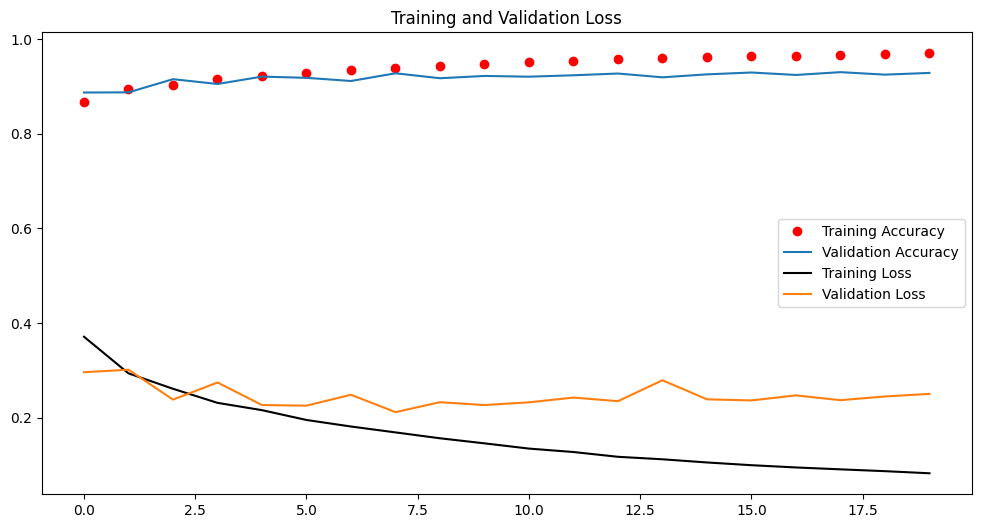

In [21]:
accuracy = model.history.history['accuracy'] 
val_accuracy = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, accuracy,"ro",  label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.plot(epochs_range, loss,"k",  label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [22]:
model.save('fashion_mnist_cnn.h5')